,point_id,pts_lon,pts_lat,geometry
0,0,-124.763068,45.543541,POINT (-124.763068 45.543541)
1,1,-124.688068,45.543541,POINT (-124.688068 45.543541)
2,2,-124.613068,45.543541,POINT (-124.613068 45.543541)
3,3,-124.538068,45.543541,POINT (-124.538068 45.543541)
4,4,-124.463068,45.543541,POINT (-124.463068 45.543541)
5,5,-124.388068,45.543541,POINT (-124.388068 45.543541)
6,6,-124.313068,45.543541,POINT (-124.313068 45.543541)
7,7,-124.238068,45.543541,POINT (-124.238068 45.543541)
8,8,-124.163068,45.543541,POINT (-124.163068 45.543541)
9,9,-124.088068,45.543541,POINT (-124.088068 45.543541)


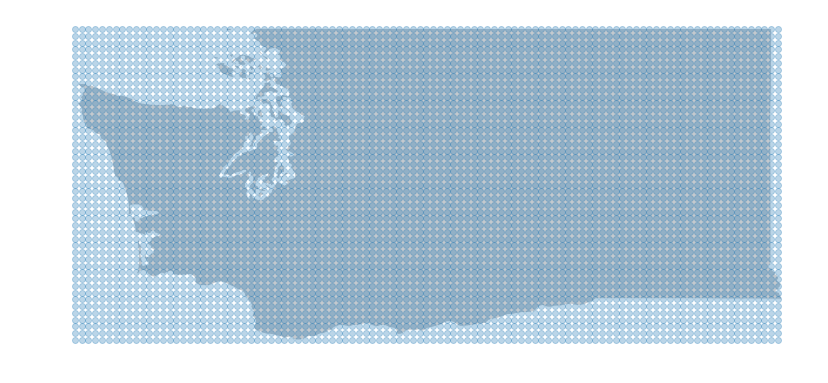

In [11]:
import pandas as pd
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import Polygon
import matplotlib as mpl
import urllib.request
import json
from requests.exceptions import HTTPError
from urllib.error import URLError
from itertools import combinations
from random import randint
import simplejson
import urllib
from datetime import datetime
from decimal import Decimal

%matplotlib inline 
mpl.rcParams['figure.figsize'] = (14,14)

'''short_drive_true = True
no_data = 'No data'
dt_1 = 'less than 30 minutes'
dt_2 = '30 minutes to 1 hour'
dt_3 = '1 or more hours' '''

nan = 'np.nan'
bing_api_key = ''
crs = {'init': 'epsg:4326'}

shp = 'Shapes/States/cb_2017_us_state_500k.shp'
us = gpd.read_file(shp)
wa = us[us['STUSPS']=="WA"]
by = .075    #trying a slightly larger grid to keep from crashing everything.


pts_grid = (
    pd.concat([pd.DataFrame({'pts_lon' : np.arange(wa.bounds['minx'], wa.bounds['maxx'], by)})
               , (pd.DataFrame({'pts_lat' : np.arange(wa.bounds['miny'], wa.bounds['maxy'], by)})
                  .pivot(columns = 'pts_lat', values = 'pts_lat'))]
        , axis = 1
             )
    .replace(method='ffill')
    .replace(method='bfill')
    .melt(id_vars=['pts_lon'])
    .drop('variable', 1)
    .rename(columns = {'value' : 'pts_lat'})
    .reset_index()
    .rename(columns={"index": "point_id"})
)
geometry_pts = [Point(xy) for xy in zip(pts_grid.pts_lon, pts_grid.pts_lat)]
gdf_pts_grid = GeoDataFrame(pts_grid, crs=crs, geometry=geometry_pts)

wa_plot = wa.plot(color='#C4C9CE', edgecolor='white')

(
    gdf_pts_grid
        .plot(ax=wa_plot, alpha = .3)
        .set_axis_off()
)



# save to shapefile so I can clip them in QGIS
#gdf_pts_grid.to_file("WA_075grid.shp")
#gdf_pts_grid

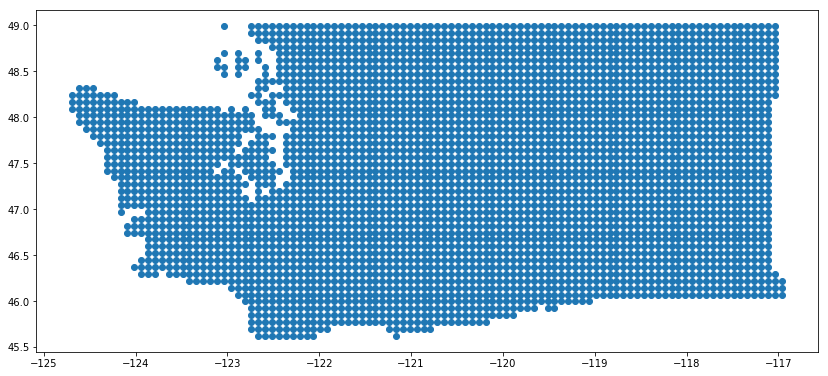

In [12]:
pts = 'WA_075pts.shp'
wa_pt_grid = gpd.read_file(pts)

wa_pt_grid.plot()



In [13]:
from itertools import combinations
from random import randint
import simplejson
import urllib
from datetime import datetime
from decimal import Decimal


#zip lat/long to single column (easier than dealing with shapely geometry)
wa_pt_grid['lat,long'] = list(zip(wa_pt_grid.pts_lat, wa_pt_grid.pts_lon))

#create a list of all coordinates so we can write this to NxN matrix
xytups = wa_pt_grid['lat,long'].tolist()

#find all unique combinations of list entries, removes duplicate geocoding (assuming travel time from A to B = B to A.)
unicombos = [comb for comb in combinations(xytups, 2)]  

print(len(xytups))
print(len(unicombos))
    
#create the similarity matrix
dmatrix = pd.DataFrame(index = xylist, columns = xylist)

#find all unique combinations of list entries (removes duplicates, assuming travel time from (1, 2) to (3, 4) is equal to travel time from (3, 4) to (1, 2))
#unicombo = [";".join(map(str, comb)) for comb in combinations(xylist, 2)]

#perform the same formatting on the xylist for matching later
#xystring = [",".join(map(str, point)) for point in xylist]

#let's now clean up the combo list (strings) that will work nicely with the Google Distance API
#unicoords = [c.replace('(', '').replace(')', '').replace(' ', '') for c in unicombo]

#now make a pandas dataframe of n x n coordinates from the xystring list
#dfmatrix = pd.DataFrame(index=xystring, columns=xystring)
                        


[(47.79354100000008, -122.88806799999993), (47.79354100000008, -123.11306799999994), (47.79354100000008, -123.03806799999994), (47.79354100000008, -122.66306799999992), (47.79354100000008, -122.58806799999992), (47.79354100000008, -122.36306799999991), (47.79354100000008, -122.28806799999991), (47.79354100000008, -122.51306799999992), (47.79354100000008, -122.0630679999999), (47.79354100000008, -121.9880679999999)]
3726
6939675
